In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


housing_data = pd.read_csv("preprocessed_data.csv")

In [2]:
# Dropping unnecessary columns
columns_to_drop = ['Unnamed: 0', 'link', 'description']
housing_data_cleaned = housing_data.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned data to verify changes
housing_data_cleaned.head()

title    home_type garage  \
0  apartamento t0 rua eleuterio teixeira 8 capari...  apartamento     No   
1    apartamento t0 sao joao caparica costa caparica  apartamento     No   
2    apartamento t0 sao joao caparica costa caparica  apartamento     No   
3  apartamento t0 avenida liberdade 5 caparica tr...  apartamento     No   
4                              apartamento t1 almada  apartamento     No   

   price home_size  home_area  floor  elevator  price_per_sqr_meter    city  \
0   1000        T0         50    0.0     False            20.000000  Almada   
1   1250        T0         60   10.0      True            20.833333  Almada   
2   1200        T0         57    6.0      True            21.052632  Almada   
3   1200        T0         50    1.0     False            24.000000  Almada   
4    918        T1         55    0.0     False            16.690909  Almada   

      source           neighborhood price_per_sqr_meter_bin         price_bin  \
0  idealista                 almada        (18.686, 23.248]  (355.38, 1364.8]   
1  idealista         costa caparica        (18.686, 23.248]  (355.38, 1364.8]   
2  idealista         costa caparica        (18.686, 23.248]  (355.38, 1364.8]   
3  idealista                 almada         (23.248, 27.81]  (355.38, 1364.8]   
4  idealista  apartamento t1 almada        (14.124, 18.686]  (355.38, 1364.8]   

    home_area_bin           street_names  
0  (42.92, 71.84]                 almada  
1  (42.92, 71.84]         costa caparica  
2  (42.92, 71.84]         costa caparica  
3  (42.92, 71.84]                 almada  
4  (42.92, 71.84]  apartamento t1 almada

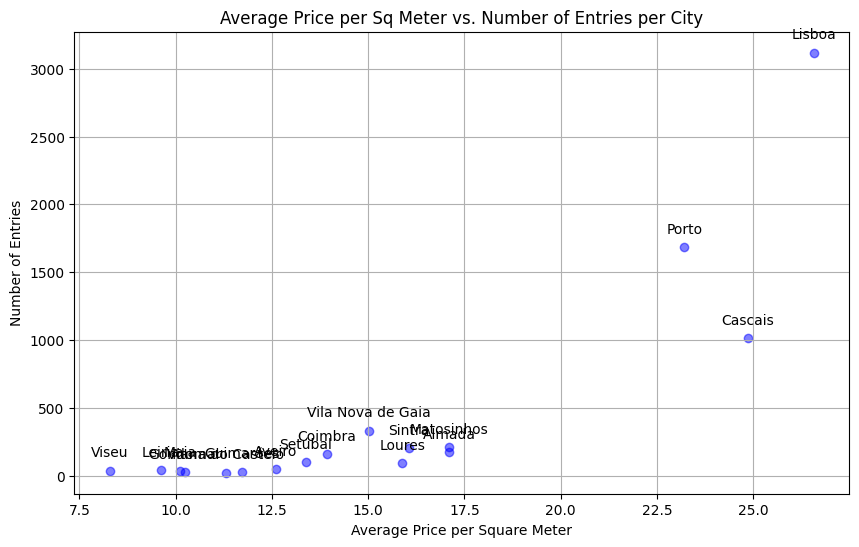

In [15]:
# Group by 'city' and aggregate
city_stats = housing_data_cleaned.groupby('city').agg(
    avg_price_per_sqr_meter=('price_per_sqr_meter', 'mean'),
    count=('city', 'size')
).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(city_stats['avg_price_per_sqr_meter'], city_stats['count'], color='blue', alpha=0.5)
# Annotating each point with the city name
for i, point in city_stats.iterrows():
    plt.annotate(point['city'],  # city name to annotate with
                 (point['avg_price_per_sqr_meter'], point['count']),  # coordinates to position the annotation
                 textcoords="offset points",  # how to interpret xytext
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.title('Average Price per Sq Meter vs. Number of Entries per City')
plt.xlabel('Average Price per Square Meter')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

In [3]:
# Dropping binned columns
binned_columns = ['price_per_sqr_meter_bin', 'price_bin', 'home_area_bin']
housing_data_cleaned = housing_data_cleaned.drop(columns=binned_columns)

# Display the first few rows of the cleaned data to verify changes
housing_data_cleaned.head()

title    home_type garage  \
0  apartamento t0 rua eleuterio teixeira 8 capari...  apartamento     No   
1    apartamento t0 sao joao caparica costa caparica  apartamento     No   
2    apartamento t0 sao joao caparica costa caparica  apartamento     No   
3  apartamento t0 avenida liberdade 5 caparica tr...  apartamento     No   
4                              apartamento t1 almada  apartamento     No   

   price home_size  home_area  floor  elevator  price_per_sqr_meter    city  \
0   1000        T0         50    0.0     False            20.000000  Almada   
1   1250        T0         60   10.0      True            20.833333  Almada   
2   1200        T0         57    6.0      True            21.052632  Almada   
3   1200        T0         50    1.0     False            24.000000  Almada   
4    918        T1         55    0.0     False            16.690909  Almada   

      source           neighborhood           street_names  
0  idealista                 almada                 almada  
1  idealista         costa caparica         costa caparica  
2  idealista         costa caparica         costa caparica  
3  idealista                 almada                 almada  
4  idealista  apartamento t1 almada  apartamento t1 almada

Average Price by City and Home Type

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


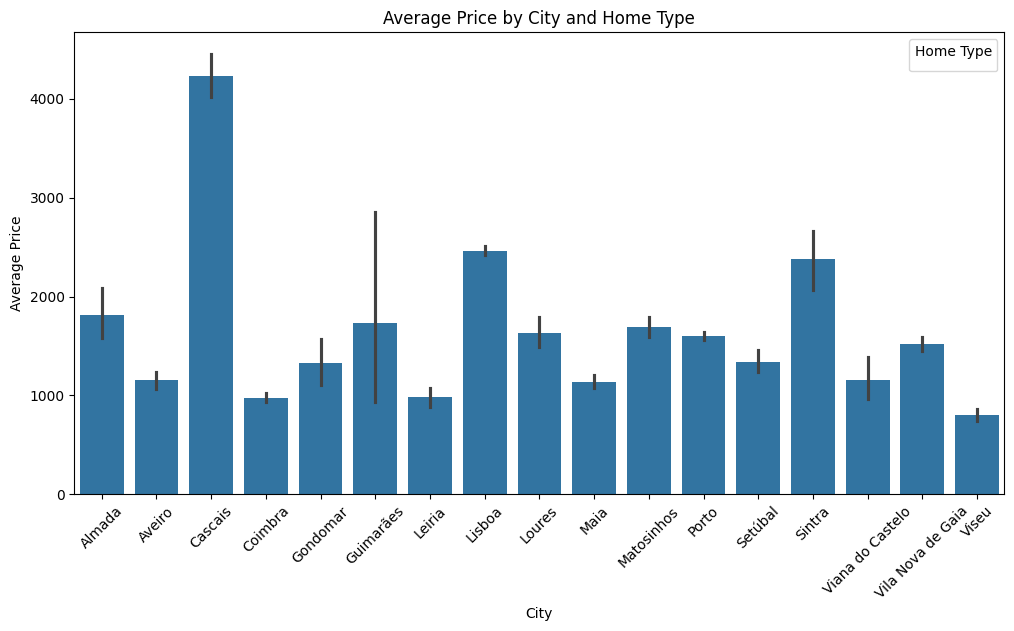

In [4]:
# Creating a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=housing_data_cleaned, x='city', y='price')
plt.title('Average Price by City and Home Type')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Home Type')
plt.show()

 Average Price per Home Type

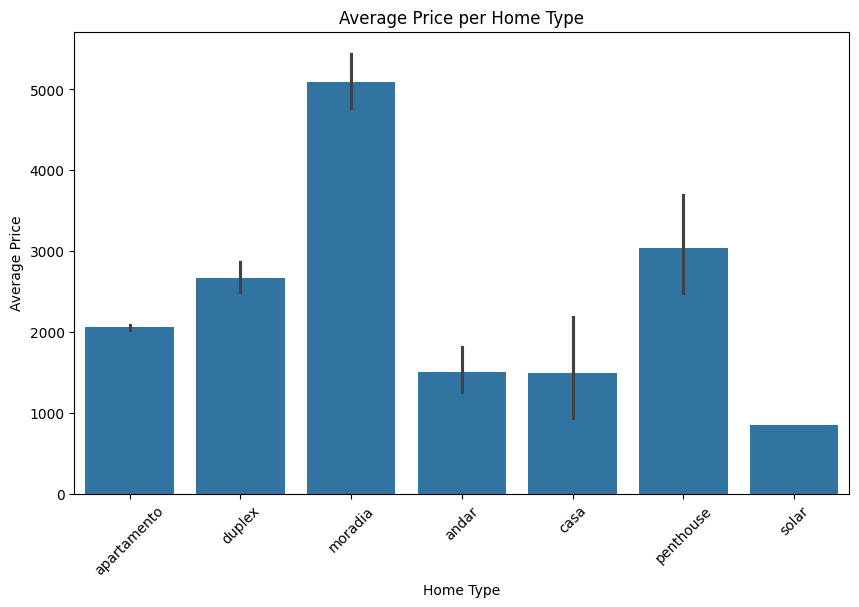

In [5]:
# Creating a bar chart for average price per home type
plt.figure(figsize=(10, 6))
sns.barplot(data=housing_data_cleaned, x='home_type', y='price', estimator=np.mean)
plt.title('Average Price per Home Type')
plt.xlabel('Home Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Average Price per Square Meter per Home Type

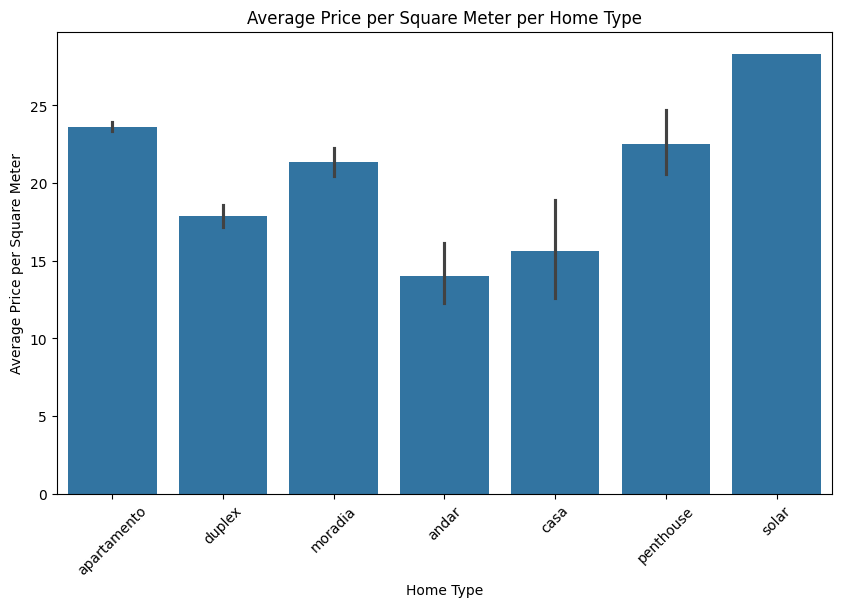

In [6]:
# Creating a bar chart for average price per square meter per home type
plt.figure(figsize=(10, 6))
sns.barplot(data=housing_data_cleaned, x='home_type', y='price_per_sqr_meter', estimator=np.mean)
plt.title('Average Price per Square Meter per Home Type')
plt.xlabel('Home Type')
plt.ylabel('Average Price per Square Meter')
plt.xticks(rotation=45)
plt.show()

Average Price per Home Size per City

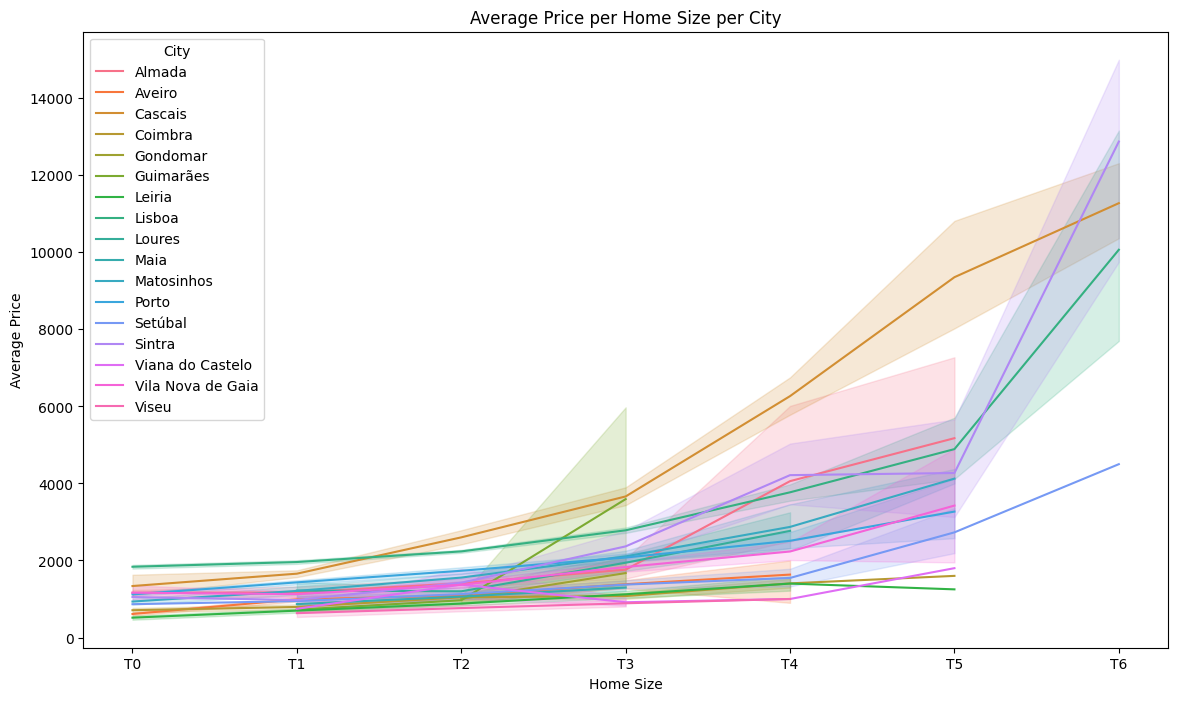

In [7]:
# Creating a multi-line chart for average price per home size per city
plt.figure(figsize=(14, 8))
sns.lineplot(data=housing_data_cleaned, x='home_size', y='price', hue='city', estimator=np.mean)
plt.title('Average Price per Home Size per City')
plt.xlabel('Home Size')
plt.ylabel('Average Price')
plt.legend(title='City')
plt.show()

Average Price per Square Meter per Home Size per City

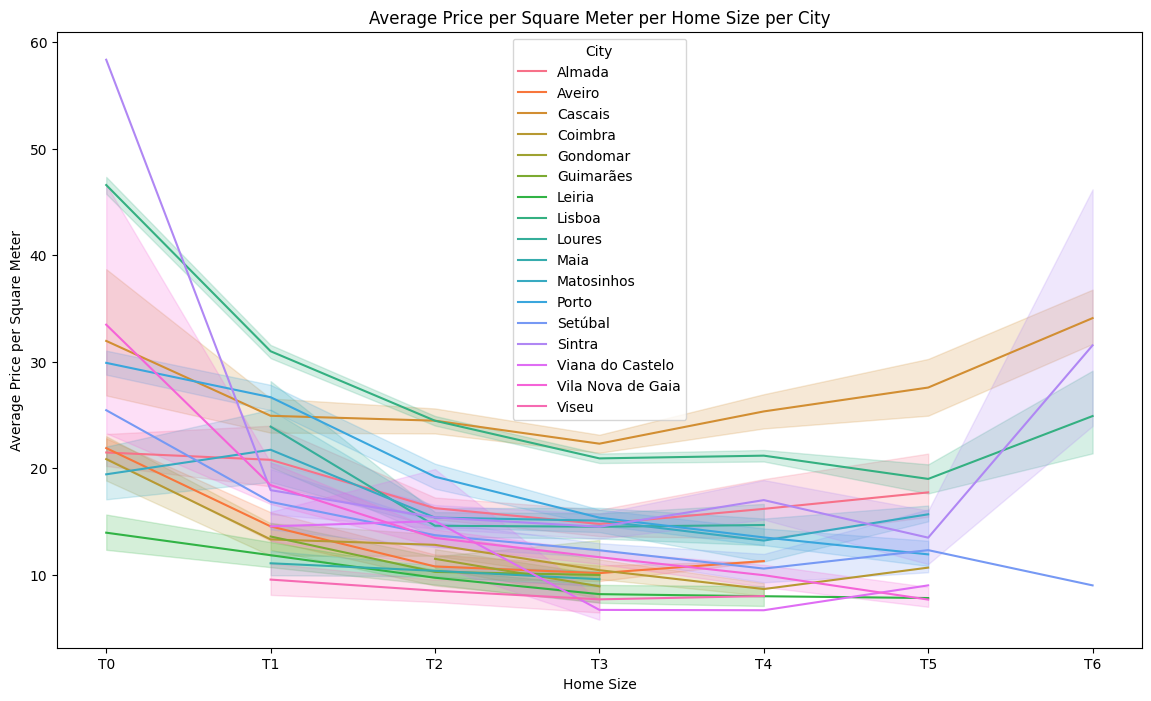

In [8]:
# Creating a multi-line chart for average price per square meter per home size per city
plt.figure(figsize=(14, 8))
sns.lineplot(data=housing_data_cleaned, x='home_size', y='price_per_sqr_meter', hue='city', estimator=np.mean)
plt.title('Average Price per Square Meter per Home Size per City')
plt.xlabel('Home Size')
plt.ylabel('Average Price per Square Meter')
plt.legend(title='City')
plt.show()

 Average Price per Neighborhood

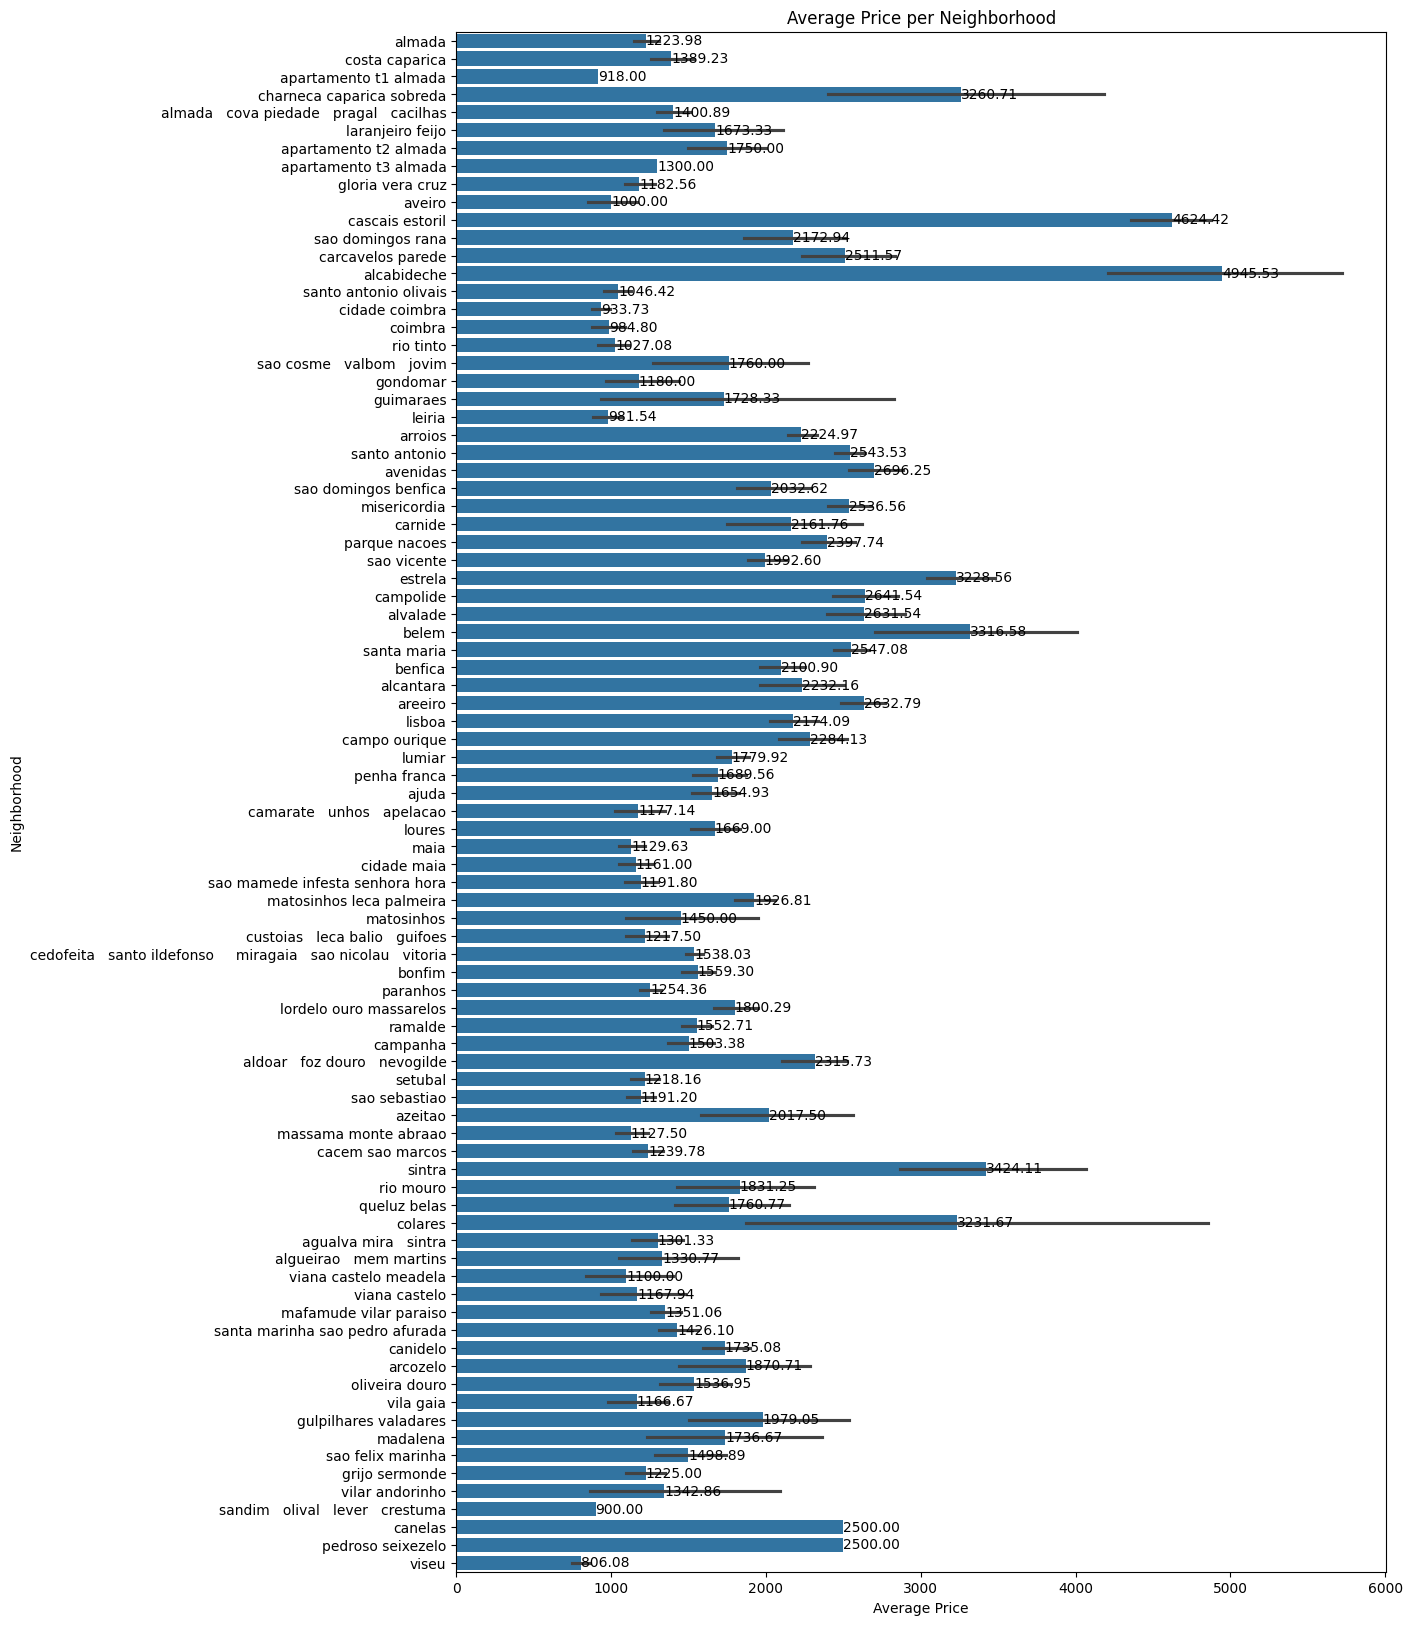

In [9]:
# Creating a horizontal bar chart for average price per neighborhood
plt.figure(figsize=(12, 20))
ax = sns.barplot(data=housing_data_cleaned, y='neighborhood', x='price', estimator=np.mean, orient='h')
plt.title('Average Price per Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')

# Add the text labels next to the bars
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
            va='center', ha='left')  # Adjust the formatting and alignment as needed


Average Price per Square Meter per Neighborhood

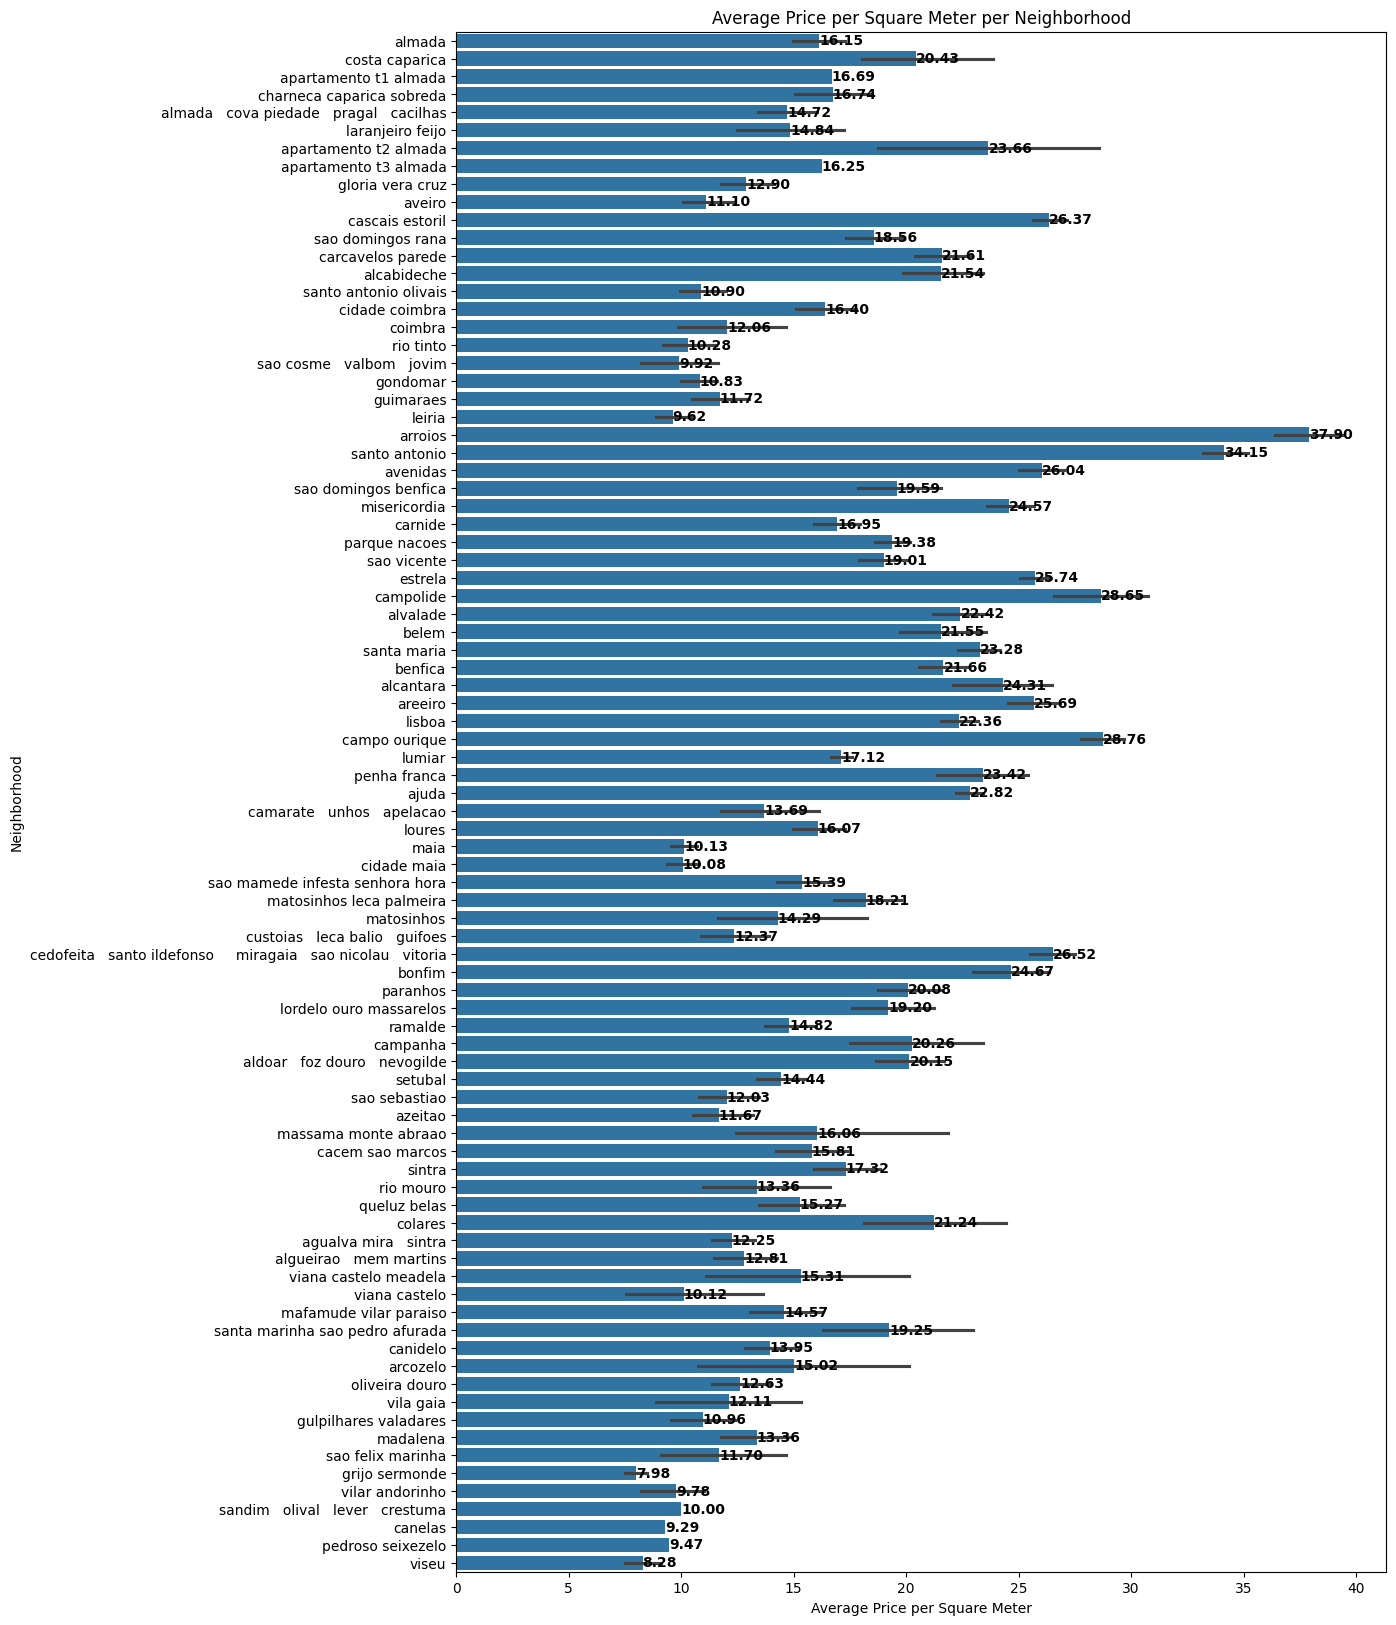

In [10]:
# Create a horizontal bar chart for average price per square meter per neighborhood
plt.figure(figsize=(12, 20))
ax = sns.barplot(data=housing_data_cleaned, y='neighborhood', x='price_per_sqr_meter', estimator=np.mean, orient='h')
plt.title('Average Price per Square Meter per Neighborhood')
plt.xlabel('Average Price per Square Meter')
plt.ylabel('Neighborhood')

# Add the text labels next to the bars
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
            va='center', ha='left', fontweight='bold')  # Adjust formatting and alignment as needed

plt.show()

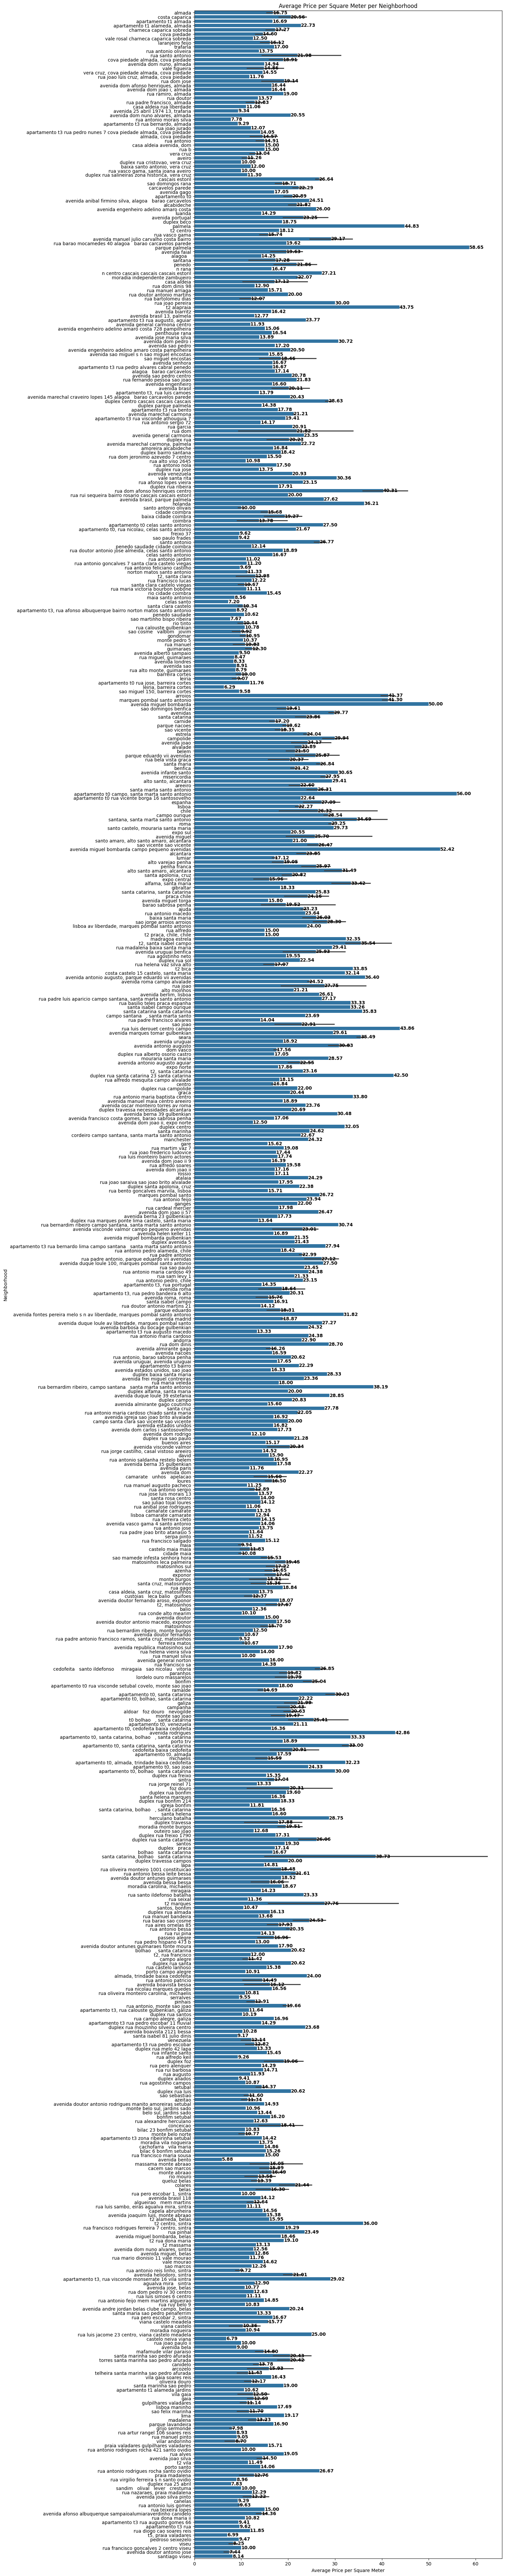

In [11]:
# Create a horizontal bar chart for average price per square meter per neighborhood
plt.figure(figsize=(12, 100))
ax = sns.barplot(data=housing_data_cleaned, y='street_names', x='price_per_sqr_meter', estimator=np.mean, orient='h')
plt.title('Average Price per Square Meter per Neighborhood')
plt.xlabel('Average Price per Square Meter')
plt.ylabel('Neighborhood')

# Add the text labels next to the bars
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
            va='center', ha='left', fontweight='bold')  # Adjust formatting and alignment as needed

plt.show()

Price per Square Meter Analysis

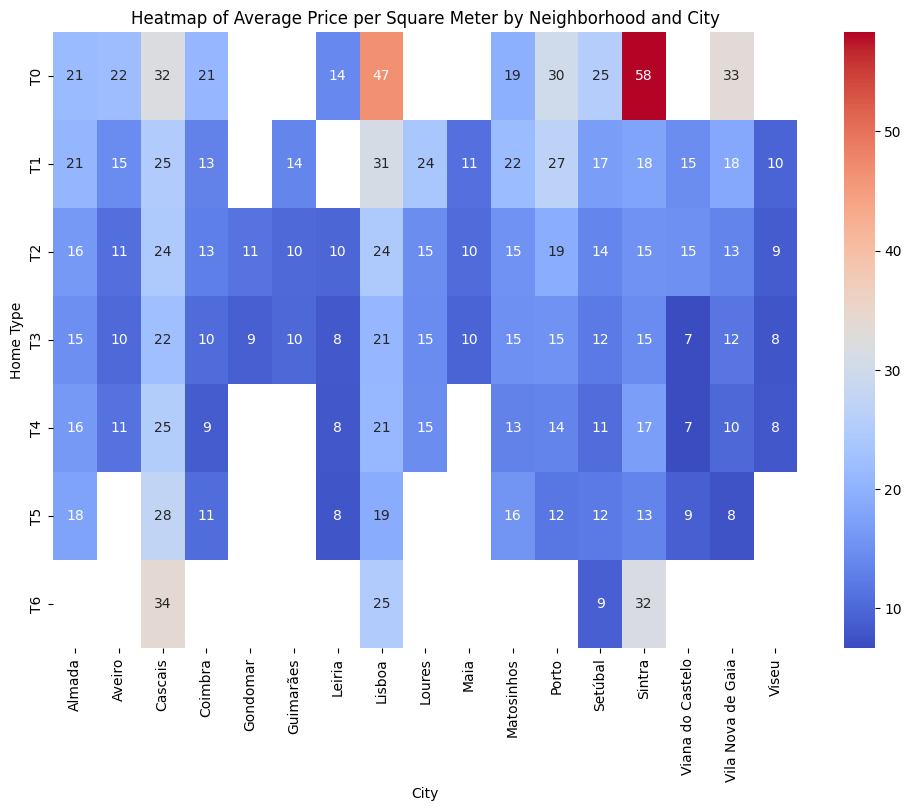

In [12]:
# Creating a heatmap
# First, prepare the data: pivot table with average price per square meter for each neighborhood
heatmap_data = housing_data_cleaned.pivot_table(values='price_per_sqr_meter', index='home_size', columns='city', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Heatmap of Average Price per Square Meter by Neighborhood and City')
plt.xlabel('City')
plt.ylabel('Home Type')
plt.show()